In [1]:
import pandas as pd
import utils

In [23]:
# convert the rmsk to gene
df_rmsk = pd.read_csv("/data2st1/junyi/output/atac0416/cCRE/rmsk.bed", sep="\t")

/tmp/ipykernel_1050210/2266675247.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_rmsk = pd.read_csv("/data2st1/junyi/output/atac0416/cCRE/rmsk.bed", sep="\t")


In [2]:
import glob
flist = glob.glob("/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/*/outs/summary*csv")

In [88]:
flist

['/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MC52E_PFC/outs/summary.csv',
 '/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MC52E_AMY_1st/outs/summary.csv',
 '/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MC50B_PFC/outs/summary.csv',
 '/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MC39C_HIP/outs/summary.csv',
 '/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MC50B_HIP/outs/summary.csv',
 '/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MW51A_HIP/outs/summary.csv',
 '/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MC48D_HIP/outs/summary.csv',
 '/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MW47A_AMY/outs/summary.csv',
 '/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MC37A_AMY/outs/summary.csv',
 '/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MW47A_PFC/outs/summary.csv',
 '/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MC50B_AMY/outs/summary.csv',
 '/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MW51A

In [91]:
adfiles={
'MC37A_AMY':'MC37A_AMY',
'MC39C_HIP':'MC39C_HIP',
'MC48D_HIP':'MC48D_HIP',
'MC50B_AMY':'MC50B_AMY',
'MC50B_HIP':'MC50B_HIP',
'MC50B_PFC':'MC50B_PFC',
'MC52E_AMY':'MC52E_AMY',
'MC52E_PFC':'MC52E_PFC',
'MW45A_HIP':'MW45A_HIP',
'MW47A_AMY':'MW47A_AMY',
'MW47A_HIP':'MW47A_HIP',
'MW47A_PFC':'MW47A_PFC',
'MW51A_AMY':'MW51A_AMY',
'MW51A_HIP':'MW51A_HIP',
'MW51A_PFC':'MW51A_PFC',
'W25_0_1_Perfrontal':'MC25A_PFC',
'W26_0_2_Perfrontal':'MW26A_PFC'
}

In [90]:
adfiles.keys()

dict_keys(['MC37A_AMY', 'MC39C_HIP', 'MC48D_HIP', 'MC50B_AMY', 'MC50B_HIP', 'MC50B_PFC', 'MC52E_AMY', 'MC52E_PFC', 'MW45A_HIP', 'MW47A_AMY', 'MW47A_HIP', 'MW47A_PFC', 'MW51A_AMY', 'MW51A_HIP', 'MW51A_PFC', 'MC25A_PFC', 'MW26A_PFC'])

In [94]:
df_all = pd.DataFrame()
for f in flist:

    sample = f.split("/")[-3]
    if not(sample in adfiles.keys()):
        continue
    else:
        df = pd.read_csv(f)
        df['sample'] = adfiles[sample]
        df_all = pd.concat([df_all, df], axis=0)
        print(df['Median high-quality fragments per cell'].values,sample)

[28195.5] MC52E_PFC
[40552.5] MC50B_PFC
[23517.] MC39C_HIP
[45490.] MC50B_HIP
[29338.] MW51A_HIP
[20728.] MC48D_HIP
[26759.] MW47A_AMY
[21611.5] MC37A_AMY
[41144.] MW47A_PFC
[31560.5] MC50B_AMY
[27430.5] MW51A_PFC
[18184.] MW45A_HIP
[28406.] MW47A_HIP
[27821.] MC52E_AMY
[26764.] W25_0_1_Perfrontal
[36247.] MW51A_AMY
[34259.] W26_0_2_Perfrontal


In [96]:
df_all['region'] = df_all['sample'].str.split("_").str[1]

In [97]:
df_all

,Sample ID,Genome,Pipeline version,Estimated number of cells,Confidently mapped read pairs,Estimated bulk library complexity,Fraction of all fragments in cells,Fraction of all fragments that pass all filters and overlap called peaks,Fraction of genome in peaks,Fraction of high-quality fragments in cells,...,Q30 bases in read 1,Q30 bases in read 2,Q30 bases in sample index i1,Sequenced read pairs,Sequencing saturation,TSS enrichment score,Unmapped read pairs,Valid barcodes,sample,region
0,MC52E_PFC,mm10,cellranger-atac-2.1.0,7766,0.9381,4.847372e+08,0.9514,0.1517,0.0462,0.9492,...,0.8210,0.9172,NaN,524315342,0.5545,8.3556,0.0034,0.9836,MC52E_PFC,PFC
0,MC50B_PFC,mm10,cellranger-atac-2.1.0,8764,0.9448,7.401247e+08,0.9529,0.1856,0.0484,0.9582,...,0.8732,0.9458,NaN,670596450,0.5170,8.4662,0.0036,0.9855,MC50B_PFC,PFC
0,MC39C_HIP,mm10,cellranger-atac-2.1.0,10778,0.9195,5.634264e+08,0.8895,0.1234,0.0396,0.9321,...,0.8153,0.9243,NaN,744529010,0.6094,8.2244,0.0048,0.9784,MC39C_HIP,HIP
0,MC50B_HIP,mm10,cellranger-atac-2.1.0,5486,0.9373,5.060145e+08,0.9121,0.1229,0.0427,0.8958,...,0.8784,0.9410,NaN,652892516,0.6138,8.2405,0.0061,0.9845,MC50B_HIP,HIP
0,MW51A_HIP,mm10,cellranger-atac-2.1.0,9162,0.9406,6.799489e+08,0.9188,0.2066,0.0681,0.9161,...,0.7896,0.9152,NaN,579559203,0.4874,10.4681,0.0046,0.9826,MW51A_HIP,HIP
0,MC48D_HIP,mm10,cellranger-atac-2.1.0,9317,0.9390,4.823342e+08,0.9157,0.1827,0.0594,0.8917,...,0.8213,0.9233,NaN,647040646,0.6049,11.7538,0.0051,0.9797,MC48D_HIP,HIP
0,MW47A_AMY,mm10,cellranger-atac-2.1.0,13407,0.9364,8.940807e+08,0.9414,0.2065,0.0593,0.9471,...,0.8189,0.9272,NaN,667457720,0.4546,10.7605,0.0047,0.9841,MW47A_AMY,AMY
0,MC37A_AMY,mm10,cellranger-atac-2.1.0,7184,0.9371,3.240959e+08,0.8679,0.1698,0.0727,0.8975,...,0.8018,0.9366,NaN,531837621,0.6834,12.6424,0.0033,0.9851,MC37A_AMY,AMY
0,MW47A_PFC,mm10,cellranger-atac-2.1.0,8965,0.9513,6.467576e+08,0.9557,0.2046,0.0598,0.9562,...,0.8475,0.9436,NaN,793139497,0.6143,9.8891,0.0046,0.9854,MW47A_PFC,PFC
0,MC50B_AMY,mm10,cellranger-atac-2.1.0,10352,0.9398,6.633858e+08,0.9499,0.1833,0.0531,0.9540,...,0.8570,0.9427,NaN,691646317,0.5609,10.4445,0.0052,0.9858,MC50B_AMY,AMY


In [98]:
df_all.iloc[:,3:-2]

,Estimated number of cells,Confidently mapped read pairs,Estimated bulk library complexity,Fraction of all fragments in cells,Fraction of all fragments that pass all filters and overlap called peaks,Fraction of genome in peaks,Fraction of high-quality fragments in cells,Fraction of high-quality fragments overlapping TSS,Fraction of high-quality fragments overlapping peaks,Fraction of transposition events in peaks in cells,...,Percent duplicates,Q30 bases in barcode,Q30 bases in read 1,Q30 bases in read 2,Q30 bases in sample index i1,Sequenced read pairs,Sequencing saturation,TSS enrichment score,Unmapped read pairs,Valid barcodes
0,7766,0.9381,4.847372e+08,0.9514,0.1517,0.0462,0.9492,0.1929,0.3118,0.2982,...,0.4434,0.8769,0.8210,0.9172,NaN,524315342,0.5545,8.3556,0.0034,0.9836
0,8764,0.9448,7.401247e+08,0.9529,0.1856,0.0484,0.9582,0.2091,0.3395,0.3222,...,0.3859,0.9124,0.8732,0.9458,NaN,670596450,0.5170,8.4662,0.0036,0.9855
0,10778,0.9195,5.634264e+08,0.8895,0.1234,0.0396,0.9321,0.1894,0.2872,0.2696,...,0.4752,0.8323,0.8153,0.9243,NaN,744529010,0.6094,8.2244,0.0048,0.9784
0,5486,0.9373,5.060145e+08,0.9121,0.1229,0.0427,0.8958,0.1894,0.2884,0.2718,...,0.4835,0.9116,0.8784,0.9410,NaN,652892516,0.6138,8.2405,0.0061,0.9845
0,9162,0.9406,6.799489e+08,0.9188,0.2066,0.0681,0.9161,0.2067,0.3944,0.3827,...,0.3803,0.8715,0.7896,0.9152,NaN,579559203,0.4874,10.4681,0.0046,0.9826
0,9317,0.9390,4.823342e+08,0.9157,0.1827,0.0594,0.8917,0.2456,0.4544,0.4344,...,0.5087,0.8545,0.8213,0.9233,NaN,647040646,0.6049,11.7538,0.0051,0.9797
0,13407,0.9364,8.940807e+08,0.9414,0.2065,0.0593,0.9471,0.2103,0.3581,0.3447,...,0.3378,0.8855,0.8189,0.9272,NaN,667457720,0.4546,10.7605,0.0047,0.9841
0,7184,0.9371,3.240959e+08,0.8679,0.1698,0.0727,0.8975,0.2418,0.4543,0.4423,...,0.5456,0.8623,0.8018,0.9366,NaN,531837621,0.6834,12.6424,0.0033,0.9851
0,8965,0.9513,6.467576e+08,0.9557,0.2046,0.0598,0.9562,0.2259,0.4270,0.4102,...,0.4648,0.9058,0.8475,0.9436,NaN,793139497,0.6143,9.8891,0.0046,0.9854
0,10352,0.9398,6.633858e+08,0.9499,0.1833,0.0531,0.9540,0.2195,0.3572,0.3402,...,0.4181,0.9076,0.8570,0.9427,NaN,691646317,0.5609,10.4445,0.0052,0.9858


In [99]:
df_all = df_all.dropna(axis=1)

In [100]:
df_all

,Sample ID,Genome,Pipeline version,Estimated number of cells,Confidently mapped read pairs,Estimated bulk library complexity,Fraction of all fragments in cells,Fraction of all fragments that pass all filters and overlap called peaks,Fraction of genome in peaks,Fraction of high-quality fragments in cells,...,Q30 bases in barcode,Q30 bases in read 1,Q30 bases in read 2,Sequenced read pairs,Sequencing saturation,TSS enrichment score,Unmapped read pairs,Valid barcodes,sample,region
0,MC52E_PFC,mm10,cellranger-atac-2.1.0,7766,0.9381,4.847372e+08,0.9514,0.1517,0.0462,0.9492,...,0.8769,0.8210,0.9172,524315342,0.5545,8.3556,0.0034,0.9836,MC52E_PFC,PFC
0,MC50B_PFC,mm10,cellranger-atac-2.1.0,8764,0.9448,7.401247e+08,0.9529,0.1856,0.0484,0.9582,...,0.9124,0.8732,0.9458,670596450,0.5170,8.4662,0.0036,0.9855,MC50B_PFC,PFC
0,MC39C_HIP,mm10,cellranger-atac-2.1.0,10778,0.9195,5.634264e+08,0.8895,0.1234,0.0396,0.9321,...,0.8323,0.8153,0.9243,744529010,0.6094,8.2244,0.0048,0.9784,MC39C_HIP,HIP
0,MC50B_HIP,mm10,cellranger-atac-2.1.0,5486,0.9373,5.060145e+08,0.9121,0.1229,0.0427,0.8958,...,0.9116,0.8784,0.9410,652892516,0.6138,8.2405,0.0061,0.9845,MC50B_HIP,HIP
0,MW51A_HIP,mm10,cellranger-atac-2.1.0,9162,0.9406,6.799489e+08,0.9188,0.2066,0.0681,0.9161,...,0.8715,0.7896,0.9152,579559203,0.4874,10.4681,0.0046,0.9826,MW51A_HIP,HIP
0,MC48D_HIP,mm10,cellranger-atac-2.1.0,9317,0.9390,4.823342e+08,0.9157,0.1827,0.0594,0.8917,...,0.8545,0.8213,0.9233,647040646,0.6049,11.7538,0.0051,0.9797,MC48D_HIP,HIP
0,MW47A_AMY,mm10,cellranger-atac-2.1.0,13407,0.9364,8.940807e+08,0.9414,0.2065,0.0593,0.9471,...,0.8855,0.8189,0.9272,667457720,0.4546,10.7605,0.0047,0.9841,MW47A_AMY,AMY
0,MC37A_AMY,mm10,cellranger-atac-2.1.0,7184,0.9371,3.240959e+08,0.8679,0.1698,0.0727,0.8975,...,0.8623,0.8018,0.9366,531837621,0.6834,12.6424,0.0033,0.9851,MC37A_AMY,AMY
0,MW47A_PFC,mm10,cellranger-atac-2.1.0,8965,0.9513,6.467576e+08,0.9557,0.2046,0.0598,0.9562,...,0.9058,0.8475,0.9436,793139497,0.6143,9.8891,0.0046,0.9854,MW47A_PFC,PFC
0,MC50B_AMY,mm10,cellranger-atac-2.1.0,10352,0.9398,6.633858e+08,0.9499,0.1833,0.0531,0.9540,...,0.9076,0.8570,0.9427,691646317,0.5609,10.4445,0.0052,0.9858,MC50B_AMY,AMY


0    medium
0    medium
0       low
0       low
0      high
0      high
0    medium
0      high
0      high
0    medium
0      high
0       low
0    medium
0       low
0       low
0       low
0      high
Name: Fraction of high-quality fragments overlapping peaks, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

In [122]:
df_frac_qc = df_all[["Fraction of high-quality fragments overlapping peaks","sample"]]

In [125]:
df_frac_qc['farcq'] = pd.qcut(
    df_all["Fraction of high-quality fragments overlapping peaks"],
    q=3,                          # 分成3部分
    labels=['0', '1', '2']  # 标签
)


/tmp/ipykernel_1942985/316867894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_frac_qc['farcq'] = pd.qcut(


In [127]:
df_frac_qc.set_index('sample', inplace=True)

In [131]:
df_frac_qc.to_csv("/data2st1/junyi/output/atac0416/frac_qc.csv")

In [132]:
pd.read_csv('/data2st1/junyi/output/atac0416/frac_qc.csv')

,sample,Fraction of high-quality fragments overlapping peaks,farcq
0,MC52E_PFC,0.3118,1
1,MC50B_PFC,0.3395,1
2,MC39C_HIP,0.2872,0
3,MC50B_HIP,0.2884,0
4,MW51A_HIP,0.3944,2
5,MC48D_HIP,0.4544,2
6,MW47A_AMY,0.3581,1
7,MC37A_AMY,0.4543,2
8,MW47A_PFC,0.4270,2
9,MC50B_AMY,0.3572,1


In [101]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler

df_selected = df_all.iloc[:,3:-2]

X = df_selected.values
scaler = StandardScaler()
X = scaler.fit_transform(X)

pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.30948597 0.23578247]
[11.46871992 10.01037202]


In [117]:
np.percentile(df_selected.iloc[:,8], 33)

0.308416

In [114]:
pca.components_[0]

array([-0.15192252,  0.29595566, -0.15215904,  0.18304178,  0.21870678,
        0.29287856,  0.14476451,  0.32297912,  0.33113951,  0.32964184,
       -0.0152654 ,  0.05775788,  0.10239822,  0.0629585 , -0.09382326,
        0.33179285,  0.17010953,  0.07317766,  0.01652939,  0.08863609,
       -0.08265999,  0.1704437 ,  0.27372555, -0.0294828 ,  0.25390023])

In [115]:
df_selected.iloc[:,[1,5,7,8,9,15]]

,Confidently mapped read pairs,Fraction of genome in peaks,Fraction of high-quality fragments overlapping TSS,Fraction of high-quality fragments overlapping peaks,Fraction of transposition events in peaks in cells,Number of peaks
0,0.9381,0.0462,0.1929,0.3118,0.2982,135337
0,0.9448,0.0484,0.2091,0.3395,0.3222,147673
0,0.9195,0.0396,0.1894,0.2872,0.2696,126160
0,0.9373,0.0427,0.1894,0.2884,0.2718,132774
0,0.9406,0.0681,0.2067,0.3944,0.3827,178607
0,0.9390,0.0594,0.2456,0.4544,0.4344,184736
0,0.9364,0.0593,0.2103,0.3581,0.3447,168837
0,0.9371,0.0727,0.2418,0.4543,0.4423,191677
0,0.9513,0.0598,0.2259,0.4270,0.4102,176190
0,0.9398,0.0531,0.2195,0.3572,0.3402,162880


In [111]:
df_all.iloc[:,3:-2].iloc[:,15]

0    135337
0    147673
0    126160
0    132774
0    178607
0    184736
0    168837
0    191677
0    176190
0    162880
0    168001
0    116470
0    149291
0    144177
0    117356
0    149339
0    182701
Name: Number of peaks, dtype: int64

<Axes: >

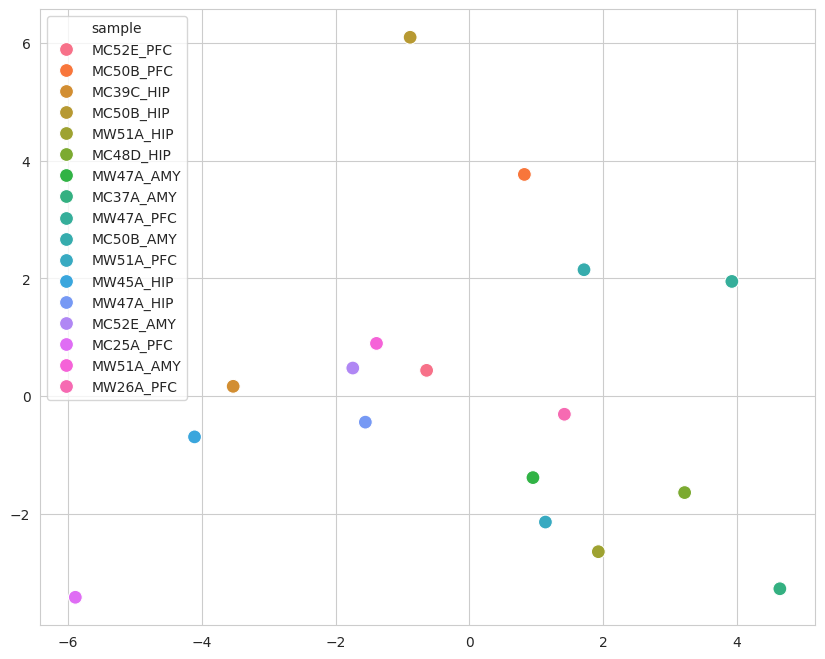

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
sns.scatterplot(x=pca.transform(X)[:, 0], y=pca.transform(X)[:, 1], hue=df_all['sample'], s=100)

In [152]:
from bioinfokit import analys, visuz

df_up = pd.read_csv("/data2st1/junyi/output/atac0416/dar/region_nt/PFC_PFC_Glut_MC_mementoht.csv",index_col=0)
df_down = pd.read_csv("/data2st1/junyi/output/atac0416/dar/region_nt/PFC_PFC_Glut_MW_mementoht.csv",index_col=0)

df_all = pd.concat([df_up, df_down], axis=0)

In [157]:
df_all.sort_values(by='de_coef', ascending=False, inplace=True)

In [159]:
df_all.set_index('gene', inplace=True)

In [161]:
df_all

,tx,de_coef,de_se,de_pval,dv_coef,dv_se,dv_pval
gene,,,,,,,
chrY:90740205-90740706,stim,1.068063,0.073483,2.140790e-47,0.570462,0.215657,8.453534e-03
chr13:119488180-119488681,stim,1.059920,0.059051,7.401499e-71,-0.167631,0.206899,3.916395e-01
chr8:120268552-120269053,stim,0.992916,0.067033,2.324347e-49,0.423749,0.172493,1.805685e-02
chr10:117025770-117026271,stim,0.928342,0.070893,2.234588e-39,0.271839,0.204310,1.890252e-01
chr1:41027521-41028022,stim,0.926536,0.053821,2.474591e-66,-0.203597,0.170651,2.208766e-01
...,...,...,...,...,...,...,...
chr9:41474512-41475013,stim,-0.302199,0.083666,2.655381e-04,-0.527416,0.286861,5.275962e-02
chr10:80131397-80131898,stim,-0.309079,0.079634,9.727461e-05,-0.493386,0.243540,3.262645e-02
chr13:9011541-9012042,stim,-0.316246,0.033672,4.891104e-21,0.806492,0.162717,7.928856e-07


In [162]:
visuz.GeneExpression.volcano(
    df=df_all,
    lfc="de_coef",
    pv="de_pval",
    lfc_thr=(1, 2), pv_thr=(0.05, 0.01),
)


AssertionError: either significant or non-significant genes are missing; try to change lfc_thr or pv_thr to include both significant and non-significant genes

In [26]:
df_rmsk = df_rmsk.dropna()

In [31]:
df_rmsk['genoStart'] = df_rmsk['genoStart'].astype(int)
df_rmsk['genoEnd'] = df_rmsk['genoEnd'].astype(int)

/tmp/ipykernel_1050210/4204012226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rmsk['genoStart'] = df_rmsk['genoStart'].astype(int)
/tmp/ipykernel_1050210/4204012226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rmsk['genoEnd'] = df_rmsk['genoEnd'].astype(int)


In [36]:
df_rmsk['names'] = df_rmsk['genoName']+":"+ df_rmsk['genoStart'].astype(str) + "-" + df_rmsk['genoEnd'].astype(str)

/tmp/ipykernel_1050210/2353261548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rmsk['names'] = df_rmsk['genoName']+":"+ df_rmsk['genoStart'].astype(str) + "-" + df_rmsk['genoEnd'].astype(str)


In [39]:
df_rmsk.head()

,#bin,swScore,milliDiv,milliDel,milliIns,genoName,genoStart,genoEnd,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id,names,type
0,0,239.0,248.0,8.0,62.0,chr1,67108752,67108881,-128363090.0,+,RLTR17B_Mm,LTR,ERVK,329.0,450.0,-352.0,1.0,chr1:67108752-67108881,Other repeats
1,0,230.0,346.0,25.0,0.0,chr1,134217651,134217732,-61254239.0,-,BC1_Mm,scRNA,scRNA,-56.0,96.0,14.0,2.0,chr1:134217651-134217732,Other repeats
2,1,8310.0,151.0,115.0,8.0,chr1,8386825,8389555,-187082416.0,-,Lx2,LINE,L1,0.0,6997.0,3977.0,7.0,chr1:8386825-8389555,Other repeats
3,1,32159.0,86.0,8.0,52.0,chr1,16776988,16779051,-178692920.0,+,L1_Mus1,LINE,L1,4513.0,6565.0,-2.0,2.0,chr1:16776988-16779051,Other repeats
4,1,216.0,318.0,73.0,91.0,chr1,33554408,33554640,-161917331.0,-,B4,SINE,B4,-48.0,244.0,17.0,4.0,chr1:33554408-33554640,Other repeats


In [40]:
set(df_rmsk.repClass)

{'DNA',
 'DNA?',
 'LINE',
 'LINE?',
 'LTR',
 'LTR?',
 'Low_complexity',
 'Other',
 'RC',
 'RC?',
 'RNA',
 'Retroposon',
 'SINE',
 'SINE?',
 'Satellite',
 'Simple_repeat',
 'Unknown',
 'rRNA',
 'scRNA',
 'snRNA',
 'srpRNA',
 'tRNA'}

In [38]:
df_rmsk["type"] = "Other repeats"

/tmp/ipykernel_1050210/2097119141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rmsk["type"] = "Other repeats"


In [43]:
df_rmsk.loc[df_rmsk.repClass.str.contains("SINE"),"type"] = "SINE"
df_rmsk.loc[df_rmsk.repClass.str.contains("LINE"),"type"] = "LINE"
df_rmsk.loc[df_rmsk.repClass.str.contains("LTR"),"type"] = "LTR"

In [45]:
df_rmsk_select = df_rmsk[["genoName", "genoStart", "genoEnd",'strand', "type", "names"]]

In [49]:
df_rmsk_select.columns = ["chr", "start", "end", "strand", "type", "names"]
df_rmsk_select

,chr,start,end,strand,type,names
0,chr1,67108752,67108881,+,LTR,chr1:67108752-67108881
1,chr1,134217651,134217732,-,Other repeats,chr1:134217651-134217732
2,chr1,8386825,8389555,-,LINE,chr1:8386825-8389555
3,chr1,16776988,16779051,+,LINE,chr1:16776988-16779051
4,chr1,33554408,33554640,-,SINE,chr1:33554408-33554640
...,...,...,...,...,...,...
5333734,chrY_JH584303_random,152556,155890,+,LINE,chrY_JH584303_random:152556-155890
5333735,chrY_JH584303_random,155890,156883,+,LINE,chrY_JH584303_random:155890-156883
5333736,chrY_JH584303_random,157069,157145,-,LTR,chrY_JH584303_random:157069-157145
5333737,chrY_JH584303_random,157908,157960,-,LTR,chrY_JH584303_random:157908-157960


In [52]:
df_rmsk_select = df_rmsk_select[df_rmsk_select['chr'].str.match(r'^chr([1-9]|1\d|2[0-2]|[XYM])$')]


In [53]:
df_rmsk_gene = utils.annotate_region(df_rmsk_select,region_col='names', bedfile='/data2st1/junyi/generegion_vM23/genebody_selected.bed')

In [57]:
df_rmsk_gene.loc[df_rmsk_gene.distance!= 0,'gene_name'] = 'intergenic'
df_rmsk_gene.loc[df_rmsk_gene.distance!= 0,'gene_id'] = 'intergenic'


In [67]:
df_rmsk_gene['score'] = "."

In [ ]:
df_all_rmsk_gene= df_rmsk_gene[['chr', 'start', 'end','score', 'strand_x','gene_name', 'gene_id', 'type']]
df_all_rmsk_gen

In [73]:
for type in df_all_rmsk_gene['type'].unique():
    df_rmsk_gene_type = df_all_rmsk_gene[df_all_rmsk_gene['type'] == type]
    df_rmsk_gene_type.to_csv(f"/data2st1/junyi/output/atac0416/cCRE/{type}.bed", sep="\t", index=False, header=False)

In [ ]:
df_cpg = pd.read_csv("/data2st1/junyi/output/atac0416/cCRE/cpgIslandExt.txt", sep="\t", header=None)

In [77]:
df_cpg.iloc[:,4] = df_cpg.iloc[:,4].str.replace(" ", "")

In [81]:
df_cpg_subset = df_cpg.iloc[:,[1,2,3,4]]
df_cpg_subset.columns = ["chr", "start", "end", "type"]

In [85]:
df_cpg_subset
df_cpg_subset = df_cpg_subset[df_cpg_subset['chr'].str.match(r'^chr([1-9]|1\d|2[0-2]|[XYM])$')]


In [87]:
df_cpg_subset['names'] = df_cpg_subset['chr'] + ":" + df_cpg_subset['start'].astype(str) + "-" + df_cpg_subset['end'].astype(str)

/tmp/ipykernel_1050210/1162347703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cpg_subset['names'] = df_cpg_subset['chr'] + ":" + df_cpg_subset['start'].astype(str) + "-" + df_cpg_subset['end'].astype(str)


In [ ]:
df_cpg_subset_gene = utils.annotate_region(df_cpg_subset,region_col='names', bedfile='/data2st1/junyi/generegion_vM23/genebody_selected.bed')

In [89]:
df_cpg_subset_gene

,chr,start,end,type,names,gene_name,gene_id,gstart,gend,strand,annotation,distance
0,chr1,3531624,3531843,CpG:27,chr1:3531624-3531843,Xkr4,ENSMUSG00000051951.5,3205900,3671498,-,genebody,0
1,chr1,3670619,3671074,CpG:34,chr1:3670619-3671074,Xkr4,ENSMUSG00000051951.5,3205900,3671498,-,genebody,0
2,chr1,3671654,3672156,CpG:45,chr1:3671654-3672156,Xkr4,ENSMUSG00000051951.5,3205900,3671498,-,genebody,-157
3,chr1,4491701,4493673,CpG:165,chr1:4491701-4493673,Sox17,ENSMUSG00000025902.13,4490930,4497354,-,genebody,0
4,chr1,4496947,4497608,CpG:47,chr1:4496947-4497608,Gm37587,ENSMUSG00000104238.1,4496550,4499558,+,genebody,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16004,chrY,90785593,90786243,CpG:80,chrY:90785593-90786243,Gm47283,ENSMUSG00000096768.8,90784737,90816465,+,genebody,0
16005,chrY,90793289,90793819,CpG:59,chrY:90793289-90793819,Gm47283,ENSMUSG00000096768.8,90784737,90816465,+,genebody,0
16006,chrY,90818329,90818565,CpG:28,chrY:90818329-90818565,Gm47283,ENSMUSG00000096768.8,90784737,90816465,+,genebody,-1865
16007,chrY,90824266,90824502,CpG:28,chrY:90824266-90824502,Gm47283,ENSMUSG00000096768.8,90784737,90816465,+,genebody,-7802


In [90]:
df_cpg_subset_gene.loc[df_cpg_subset_gene.distance!= 0,'gene_name'] = 'intergenic'
df_cpg_subset_gene.loc[df_cpg_subset_gene.distance!= 0,'gene_id'] = 'intergenic'

In [92]:
df_cpg_subset_gene['score'] = "."

In [95]:
df_cpg_subset_gene= df_cpg_subset_gene[['chr', 'start', 'end','score', 'strand','gene_name', 'gene_id', 'type']]
df_cpg_subset_gene

,chr,start,end,score,strand,gene_name,gene_id,type
0,chr1,3531624,3531843,.,-,Xkr4,ENSMUSG00000051951.5,CpG:27
1,chr1,3670619,3671074,.,-,Xkr4,ENSMUSG00000051951.5,CpG:34
2,chr1,3671654,3672156,.,-,intergenic,intergenic,CpG:45
3,chr1,4491701,4493673,.,-,Sox17,ENSMUSG00000025902.13,CpG:165
4,chr1,4496947,4497608,.,+,Gm37587,ENSMUSG00000104238.1,CpG:47
...,...,...,...,...,...,...,...,...
16004,chrY,90785593,90786243,.,+,Gm47283,ENSMUSG00000096768.8,CpG:80
16005,chrY,90793289,90793819,.,+,Gm47283,ENSMUSG00000096768.8,CpG:59
16006,chrY,90818329,90818565,.,+,intergenic,intergenic,CpG:28
16007,chrY,90824266,90824502,.,+,intergenic,intergenic,CpG:28


In [96]:
df_cpg_subset_gene.to_csv("/data2st1/junyi/output/atac0416/cCRE/cpg.bed", sep="\t", index=False, header=False)

In [97]:
df_interg = pd.read_csv("/data2st1/junyi/generegion_vM23/intergenic.bed", sep="\t", header=None)

In [99]:
df_interg.columns = ["chr", "start", "end", "score", "strand", "gene_name"]

In [101]:
df_interg['type'] = df_interg['gene_id'] = df_interg['gene_name'] 


In [104]:
df_interg = df_interg[df_interg['chr'].str.match(r'^chr([1-9]|1\d|2[0-2]|[XYM])$')]


In [117]:
df_interg.loc[df_interg.end==".","end"] = df_interg.loc[df_interg.end==".","start"]

In [118]:
df_interg.to_csv("/data2st1/junyi/output/atac0416/cCRE/intergenic.bed", sep="\t", index=False, header=False)